To extract raw data from PDF/Docx:

1. [pdftohtml](https://poppler.freedesktop.org/)
2. [PDFMiner](https://pypi.org/project/pdfminer/)
3. [Apache Tika](https://tika.apache.org/)
4. [docx2txt](https://pypi.org/project/docx2txt/)


Download the data from Kaggle at  https://www.kaggle.com/gauravduttakiit/resume-dataset

In [ ]:
!unzip /content/Resumes.zip

Archive:  /content/Resumes.zip
  inflating: UpdatedResumeDataSet.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("/content/UpdatedResumeDataSet.csv", encoding='utf-8')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
894,Testing,Computer Skills: â¢ Proficient in MS office (...
895,Testing,â Willingness to accept the challenges. â ...
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
897,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
print(df.Resume[0])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [ ]:
text = df.Resume[0]

# Entities to Extract

1. Skills
2. Education
3. Experience

In [ ]:
# Rule-based matching
import nltk
import re
import spacy
from spacy.matcher import Matcher

nltk.download('stopwords')
nltk.download('punkt')

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)

def extract_skills(resume_text):
   nlp_text = nlp(resume_text)
  
   # Lines that start with 'Skills', 'Areas of Interest'
   pattern1 = [{'TEXT': {"REGEX": "\Skills"}}]
   pattern2 = [{'LOWER': {"REGEX": "\skills"}}]
  
   matcher.add('SKILLS', None, pattern1)
   matcher.add('skills', None, pattern2)
  
   matches = matcher(nlp_text)
   
   if matches is not None:
    for match_id, start, end in matches:
        span = nlp_text[end:]
        regex = re.search("\\r\\n", span.text)
        line = span.text[:regex.start()]
        return line
   else:
     return None

def preprocess_text(input_text):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  #word_tokens = nltk.tokenize.word_tokenize(input_text)
  word_tokens = nlp(input_text)

  # remove the stop words
  filtered_tokens = [w for w in word_tokens if w not in stop_words]

  # remove the punctuation
  #filtered_tokens = [w for w in filtered_tokens if w.isalpha()]
  filtered_tokens = [w for w in filtered_tokens if w.text.isalpha()]

  return filtered_tokens

cnt=0
word_list = []
for id, text in enumerate(df.Resume):
  skills = extract_skills(text)
  if skills is not None:
    cnt+=1
    skills = preprocess_text(skills)
    word_list.extend(skills)
    #print(id,skills)
print("Matched Resumes:",(cnt/len(df.Resume))*100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Matched Resumes: 39.75903614457831


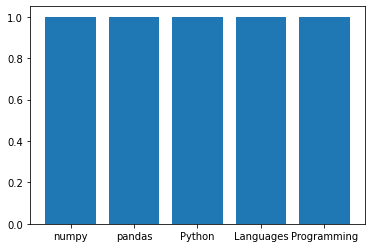

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

counts = dict(Counter(word_list).most_common(5))

labels, values = zip(*counts.items())

labels = [str(l) for l in labels]

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [ ]:
for l in list(dict(Counter(word_list).most_common(20)).keys()):
  print(str(l).lower())

programming
languages
python
pandas
numpy
scipy
scikit
learn
matplotlib
sql
java
javascript
jquery
machine
learning
regression
svm
bayes
knn
random


Use TF-IDF to remove unimportant words


In [ ]:
# you may read the database from a csv file or some other database
SKILLS_DB = ['programming languages',
            'python',
            'pandas',
            'numpy',
            'scipy',
            'scikit-learn',
            'matplotlib',
            'sql',
            'java',
            'javaScript',
            'jQuery',
            'machine learning',
            'regression',
            'svm',
            'bayes',
            'knn',
            'random']

#SKILLS_DB = dict(Counter(word_list).most_common(20)).keys()

def extract_skills(input_text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = nltk.tokenize.word_tokenize(input_text)
    #word_tokens = nlp(input_text)

    # remove the stop words
    filtered_tokens = [w for w in word_tokens if w not in stop_words]

    # remove the punctuation
    filtered_tokens = [w for w in word_tokens if w.isalpha()]
    #filtered_tokens = [w for w in filtered_tokens if w.text.isalpha()]

    # generate bigrams and trigrams (such as 'machine learning')
    bigrams_trigrams = list(map(' '.join, nltk.everygrams(filtered_tokens, 2, 3)))

    # we create a set to keep the results in.
    found_skills = set()

    # we search for each token in our skills database
    for token in filtered_tokens:
        if token.lower() in SKILLS_DB:
            found_skills.add(token)

    # we search for each bigram and trigram in our skills database
    for ngram in bigrams_trigrams:
        if ngram.lower() in SKILLS_DB:
            found_skills.add(ngram)

    return found_skills


if __name__ == '__main__':
    for text in df.Resume:
      skills = extract_skills(text)
      if len(skills):
        print(skills)

['Skills Programming', 'Programming Languages', 'Languages Python', 'Python pandas', 'pandas numpy', 'numpy scipy', 'scipy matplotlib', 'matplotlib Sql', 'Sql Java', 'Java Machine', 'Machine learning', 'learning Regression', 'Regression SVM', 'SVM Bayes', 'Bayes KNN', 'KNN Random', 'Random Forest', 'Forest Decision', 'Decision Trees', 'Trees Boosting', 'Boosting techniques', 'techniques Cluster', 'Cluster Analysis', 'Analysis Word', 'Word Embedding', 'Embedding Sentiment', 'Sentiment Analysis', 'Analysis Natural', 'Natural Language', 'Language processing', 'processing Dimensionality', 'Dimensionality reduction', 'reduction Topic', 'Topic Modelling', 'Modelling LDA', 'LDA NMF', 'NMF PCA', 'PCA Neural', 'Neural Nets', 'Nets Database', 'Database Visualizations', 'Visualizations Mysql', 'Mysql SqlServer', 'SqlServer Cassandra', 'Cassandra Hbase', 'Hbase ElasticSearch', 'ElasticSearch Plotly', 'Plotly kibana', 'kibana matplotlib', 'matplotlib ggplot', 'ggplot Tableau', 'Tableau Others', 'Ot

SOME PROBLEMS WITH THIS APPROACH

1. Skills DB doesn't handle bigrams/trigrams
2. Doesn't discard unimportant words